# Generation of Penrose tilings of type P2 and P3 by deflation

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import itertools

## Settings

In [2]:
TRIANGLE_TYPES = [1, 2] # type 1 generates P2-tilings, type 2 generates P3-tilings
SHAPES = ['A', 'O'] # 'A': acute equilateral triangle, 'O': obtuse equilateral triangle 
SIDES = ['F', 'B'] # 'F': frontside, 'B': backside

LINE_COLOR = 'black'
TRIANGLE_COLOR_PER_TYPE_SHAPE_SIDE = {
    1: {
        'A': {
            'F': (1, 0, 0, 1),
            'B': (1, 0, 0, 0.5),
        },
        'O': {
            'F': (1, 0.5, 0, 1),
            'B': (1, 0.5, 0, 0.5),
        }
    },
    2: {
        'A': {
            'F': (0, 0, 1, 1),
            'B': (0, 0, 1, 0.5),
        },
        'O': {
            'F': (0, 0.5, 1, 1),
            'B': (0, 0.5, 1, 0.5),
        }
    }
}

## Data structres and helpers

In [3]:
def rotate(point, origin, angle_deg):
    '''Returns the complex number `point` rotated counter-clockwise around the complex number `origin` by `angle_deg` degrees.'''
    angle_rad = np.deg2rad(angle_deg)
    return (point - origin) * np.exp(1j * angle_rad) + origin

In [4]:
class RobinsonTriangle:
    '''
    Containter for Robinson triangles.
    
    Attributes
    ----------
    A, B, C: complex
        The points of this (equilateral) triangle. A is the top point. B and C are defined counter-clockwise.
    t_type: int
        1 for type 1 or 2 for type 2.
    shape: str
        'A' if this triangle is acute or 'O' if this triangle is obtuse.
    side: str
        'F' if this triangle lies on the front side or 'B' if this triangle lies on the back side.
    '''
    def __init__(self, t_type, shape, side, A, B):
        '''Note that C is calculated from A and B.'''
        if t_type not in TRIANGLE_TYPES:
            raise ValueError('t_type must be in {}, but is {}'.format(triangle_types, t_type))
        self.t_type = t_type
        if shape not in SHAPES:
            raise ValueError('shape must be in {}, but is {}'.format(shapes, shape))
        self.shape = shape
        self.side = side
        if side not in SIDES:
            raise ValueError('side must be in {}, but is {}'.format(sides, side))
        self.side = side
        if abs(B - A) == 0:
            raise ValueError('points {} and {} are identical, but must be different'.format(A, B))
        if not isinstance(A, complex):
            raise ValueError('A must be a complex number but is {}'.format(type(A)))
        if not isinstance(B, complex):
            raise ValueError('B must be a complex number but is {}'.format(type(B)))
        self.A = A # the point at the top of the equilateral triangle as a complex number
        self.B = B # the point after A (anti-clockwise) as a complex number
        rot_angle_deg = 36 if self.shape == 'A' else 108
        self.C = rotate(B, A, rot_angle_deg)
        
    def __repr__(self):
        return '[t_type={}, shape={}, side={}, A={}, B={}, C={}]'.format(self.t_type, self.shape, self.side, self.A, self.B, self.C)
    
    def draw(self, draw_common_side=True, fill=True):
        '''
        Draws the Robinson triangle.
        
        Parameters
        ----------
        draw_common_side: bool, optional
            If True, all three sides of this triangles are drawn. If False the common side of two triangles forming a tile is not drawn.
        fill: bool, optional
            If True, this triangles is filled with the corrsponding color.
        '''
        if self.t_type == 1:
            if self.side == 'F':
                li = [[self.A.real, self.C.real], [self.A.imag, self.C.imag], [self.B.real, self.C.real], [self.B.imag, self.C.imag]]
                if draw_common_side:
                    li += [[self.A.real, self.B.real], [self.A.imag, self.B.imag]]
            elif self.side == 'B':
                li = [[self.A.real, self.B.real], [self.A.imag, self.B.imag], [self.B.real, self.C.real], [self.B.imag, self.C.imag]]
                if draw_common_side:
                    li += [[self.A.real, self.C.real], [self.A.imag, self.C.imag]]
        if self.t_type == 2:
            li = [[self.A.real, self.B.real], [self.A.imag, self.B.imag], [self.A.real, self.C.real], [self.A.imag, self.C.imag]]
            if draw_common_side:
                li += [[self.B.real, self.C.real], [self.B.imag, self.C.imag]]
        plt.plot(*li, color='black')
        if fill:
            plt.fill([self.A.real, self.B.real, self.C.real], [self.A.imag, self.B.imag, self.C.imag], color=TRIANGLE_COLOR_PER_TYPE_SHAPE_SIDE[self.t_type][self.shape][self.side])
    
    def deflate(self):
        '''Deflates this triangle according to the deflation rules.'''
        if self.t_type == 1:
            if self.shape == 'A':
                if self.side == 'F':
                    P = rotate(self.B, self.C, 360 - 36)
                    Q = rotate(self.B, self.C, 360 - 72)
                    return [
                        RobinsonTriangle(self.t_type, 'O', 'F', Q, self.A),
                        RobinsonTriangle(self.t_type, 'A', 'B', self.C, Q),
                        RobinsonTriangle(self.t_type, 'A', 'F', self.C, P),
                    ] 
                elif self.side == 'B':
                    P = rotate(self.C, self.B, 36)
                    Q = rotate(self.C, self.B, 72)
                    return [
                        RobinsonTriangle(self.t_type, 'O', 'B', Q, P),
                        RobinsonTriangle(self.t_type, 'A', 'F', self.B, P),
                        RobinsonTriangle(self.t_type, 'A', 'B', self.B, self.C),
                    ]
            elif self.shape == 'O':
                if self.side == 'F':
                    D = rotate(self.A, self.B, 360 - 36)
                    return [
                        RobinsonTriangle(self.t_type, 'A', 'B', self.B, D),
                        RobinsonTriangle(self.t_type, 'O', 'F', D, self.C),
                    ] 
                elif self.side == 'B':
                    D = rotate(self.A, self.C, 36)
                    return [
                        RobinsonTriangle(self.t_type, 'A', 'F', self.C, self.A),
                        RobinsonTriangle(self.t_type, 'O', 'B', D, self.A),
                    ] 
        elif self.t_type == 2:
            if self.shape == 'A':
                if self.side == 'F':
                    D = rotate(self.C, self.B, 36)
                    return [
                        RobinsonTriangle(self.t_type, 'A', 'F', self.B, self.C),
                        RobinsonTriangle(self.t_type, 'O', 'B', D, self.A),
                    ] 
                elif self.side == 'B':
                    D = rotate(self.B, self.C, 360 - 36)
                    return [
                        RobinsonTriangle(self.t_type, 'O', 'F', D, self.C),
                        RobinsonTriangle(self.t_type, 'A', 'B', self.C, D),
                    ] 
            elif self.shape == 'O':
                if self.side == 'F':
                    P = rotate(self.A, self.B, 360 - 36)
                    Q = rotate(self.A, P, 36)
                    return [
                        RobinsonTriangle(self.t_type, 'O', 'B', Q, self.B),
                        RobinsonTriangle(self.t_type, 'A', 'F', P, self.A),
                        RobinsonTriangle(self.t_type, 'O', 'F', P, self.C),
                    ]
                elif self.side == 'B':
                    P = rotate(self.A, self.C, 36)
                    Q = rotate(self.A, P, 360 - 36)
                return [
                        RobinsonTriangle(self.t_type, 'O', 'F', Q, P),
                        RobinsonTriangle(self.t_type, 'A', 'B', P, Q),
                        RobinsonTriangle(self.t_type, 'O', 'B', P, self.A),
                    ]

## Colors and deflation of Robinson triangles

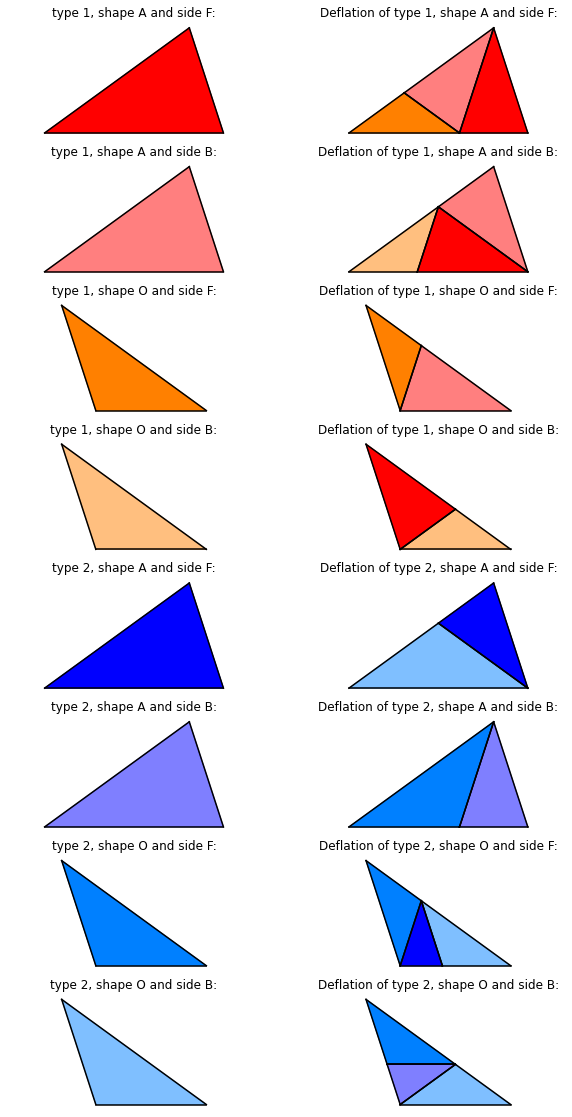

In [5]:
def draw_rt_and_deflation(i, t_type, shape, side):
    '''Visualizes the Robinson triangle of type `t_type`, shape `shape` and side `side`.'''
    plt.sca(axs[i,0])
    plt.title('type {}, shape {} and side {}:'.format(t_type, shape, side))
    plt.axis('equal')
    plt.axis('off')
    rt = RobinsonTriangle(t_type, shape, side, complex(0), complex(1))
    rt.draw()
    plt.sca(axs[i,1])
    plt.title('Deflation of type {}, shape {} and side {}:'.format(t_type, shape, side))
    plt.axis('equal')
    plt.axis('off')
    for t in rt.deflate():
        t.draw()

fig, axs = plt.subplots(8, 2, figsize=(10, 20))
        
for (i, (t_type, shape, side)) in enumerate(itertools.product(TRIANGLE_TYPES, SHAPES, SIDES)):
    draw_rt_and_deflation(i, t_type, shape, side)

plt.show()

## Some more helpers

In [6]:
def deflate_triangles(rts):
    '''Deflates all Robinson triangles in list `rts` and returns the list of all generated Robinson triangles'''
    res = []
    for rt in rts:
        res += rt.deflate()
    return res

In [7]:
def deflate(rts, iter_depth):
    '''Returns the list of the Robinson triangles after `iter_depth deflations` of the starting robinson triangles in list `rts`'''
    res = rts
    for i in range(iter_depth):
        res = deflate_triangles(res)
    return res

In [8]:
def get_box(rts):
    '''Returns the bounding box of list `rts` of Robinson triangles'''
    x_min = min([min(rt.A.real, rt.B.real, rt.C.real) for rt in rts])
    x_max = max([max(rt.A.real, rt.B.real, rt.C.real) for rt in rts])
    y_min = min([min(rt.A.imag, rt.B.imag, rt.C.imag) for rt in rts])
    y_max = max([max(rt.A.imag, rt.B.imag, rt.C.imag) for rt in rts])
    return (x_min, y_min), (x_max, y_max)

## Draw Penrose tilings

### Main drawing functions

In [9]:
def draw_rts(rts, draw_common_side=False, fill=True, fig_width=50, svg_file_name='', draw=True):
    '''Draws all Robinson triangles in list `rts`'''
    fig = plt.figure()
    (x_min, y_min), (x_max, y_max) = get_box(rts)
    y_scale = (x_max - x_min) / (y_max - y_min)
    plt.figure(figsize=(fig_width, fig_width / y_scale))
    plt.axis('equal')
    plt.axis('off')
    for t in rts:
        t.draw(draw_common_side=draw_common_side, fill=fill)
    if svg_file_name:
        plt.savefig(svg_file_name)
    if draw:
        plt.show()
    else:
        plt.close()

In [10]:
def draw_penrose_tiling(t_type=1, shape='A', side='F', iter_depth=8, A=complex(0), B=complex(1), draw_common_side=False, fill=True, fig_width=50, svg_file_name='', draw=True):
    '''Draws the Penrose tiling after `iter_depth` deflations, starting with a Robinson triangle of type `t_type`, shape `shape`, side `side`, point `A` and point `B`.'''
    rt = RobinsonTriangle(t_type, shape, side, A, B)
    draw_rts(deflate([rt], iter_depth), draw_common_side=draw_common_side, fill=fill, fig_width=fig_width, svg_file_name=svg_file_name, draw=draw)

### Some examples

<Figure size 432x288 with 0 Axes>

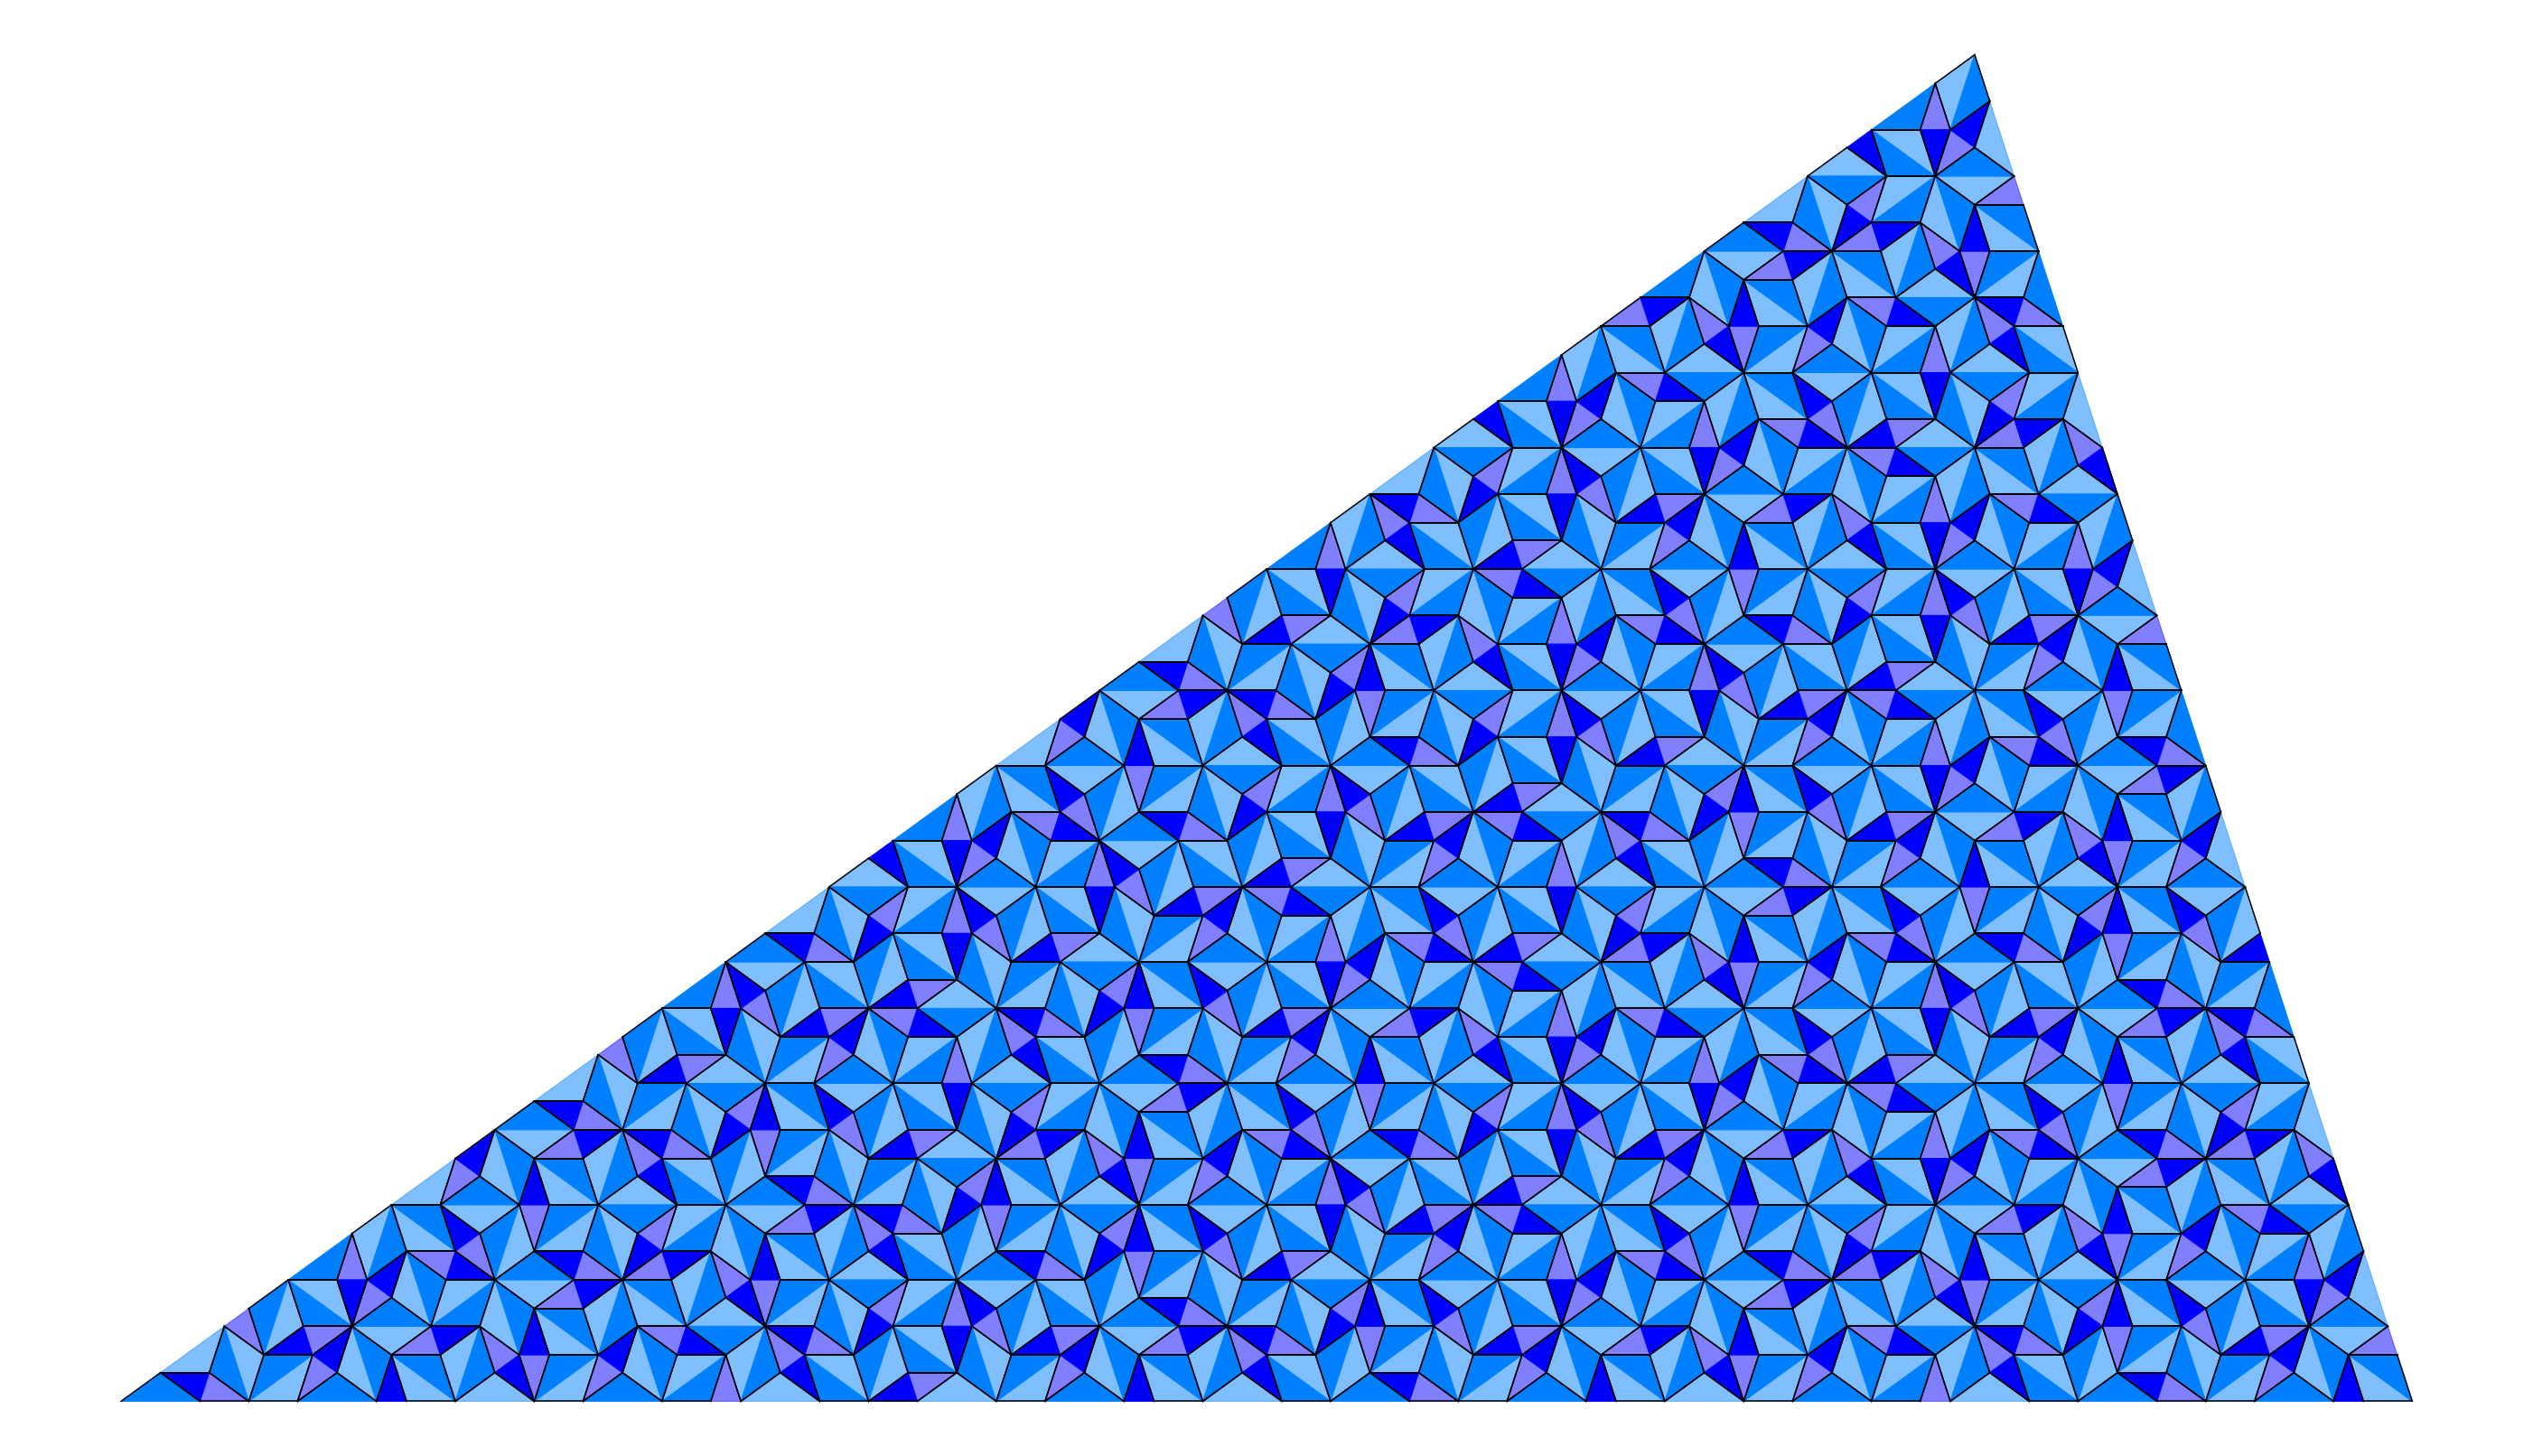

In [11]:
# penrose tiling based on the deflation of an acute front side robinson triangle of type 2 with 8 iterations
draw_penrose_tiling(2, 'A', 'F', 8)

<Figure size 432x288 with 0 Axes>

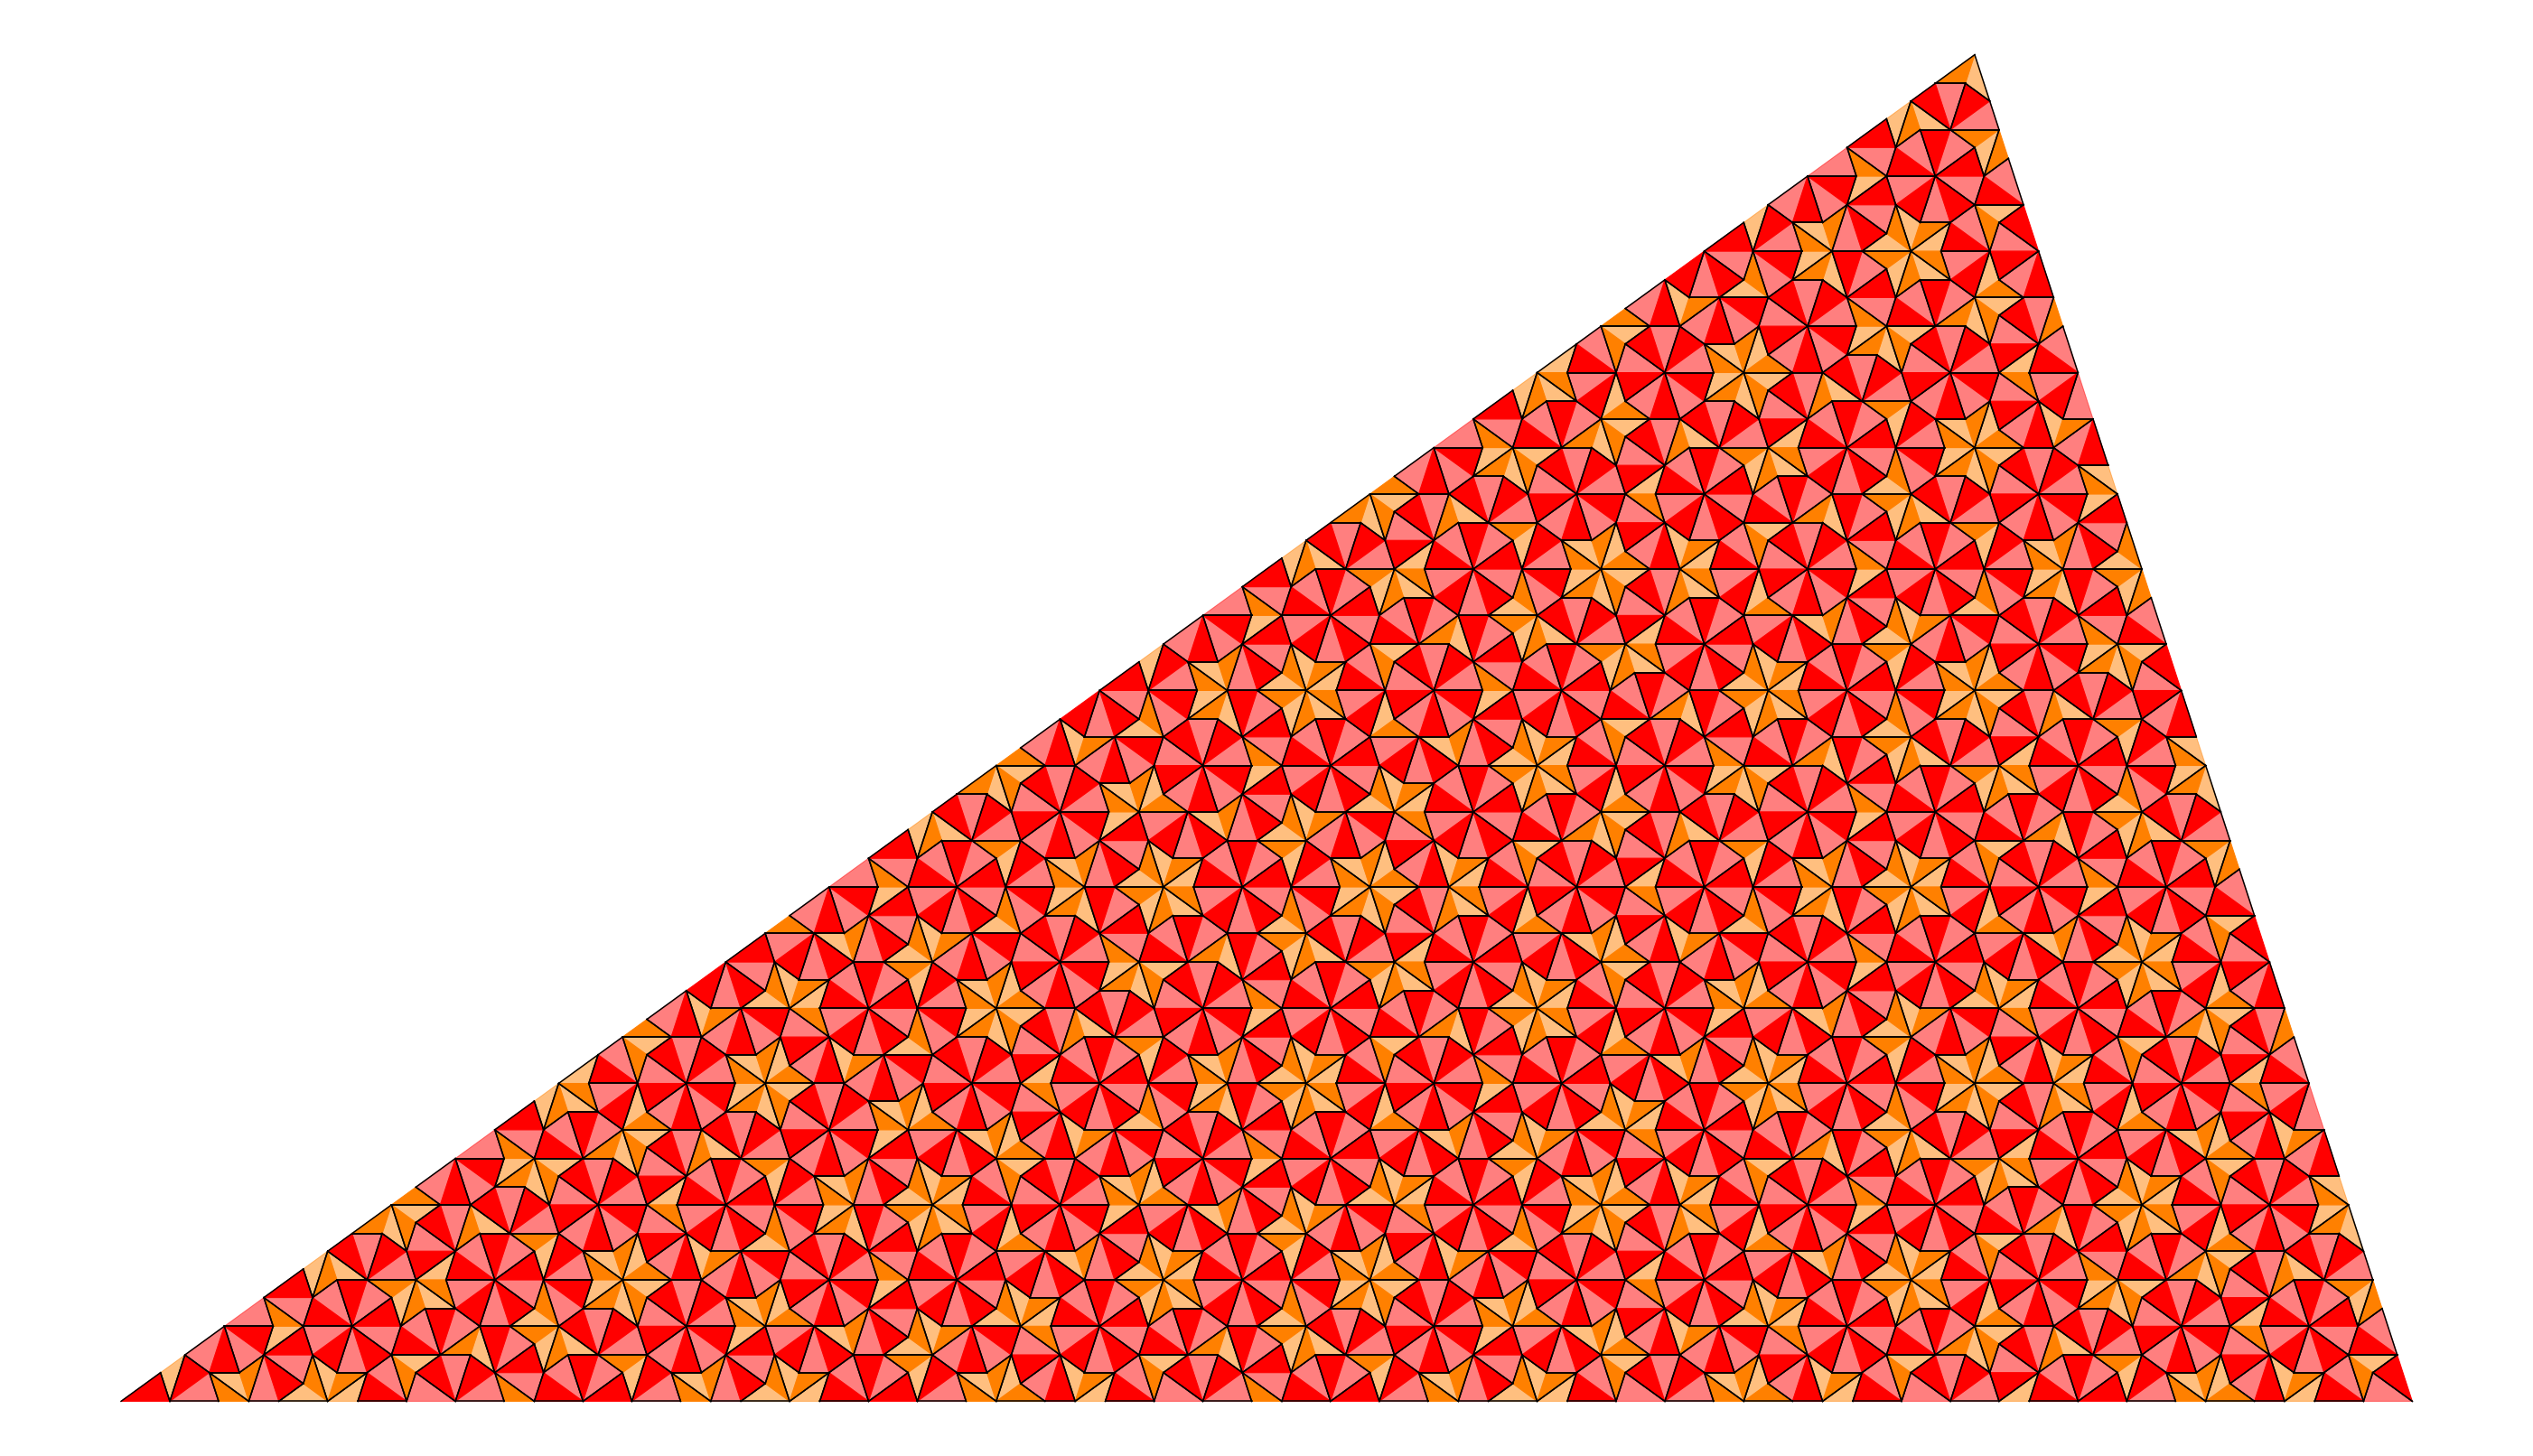

In [12]:
# penrose tiling based on the deflation of an acute front side robinson triangle of type 1 with 8 iterations
draw_penrose_tiling(1, 'A', 'F', 8)

<Figure size 432x288 with 0 Axes>

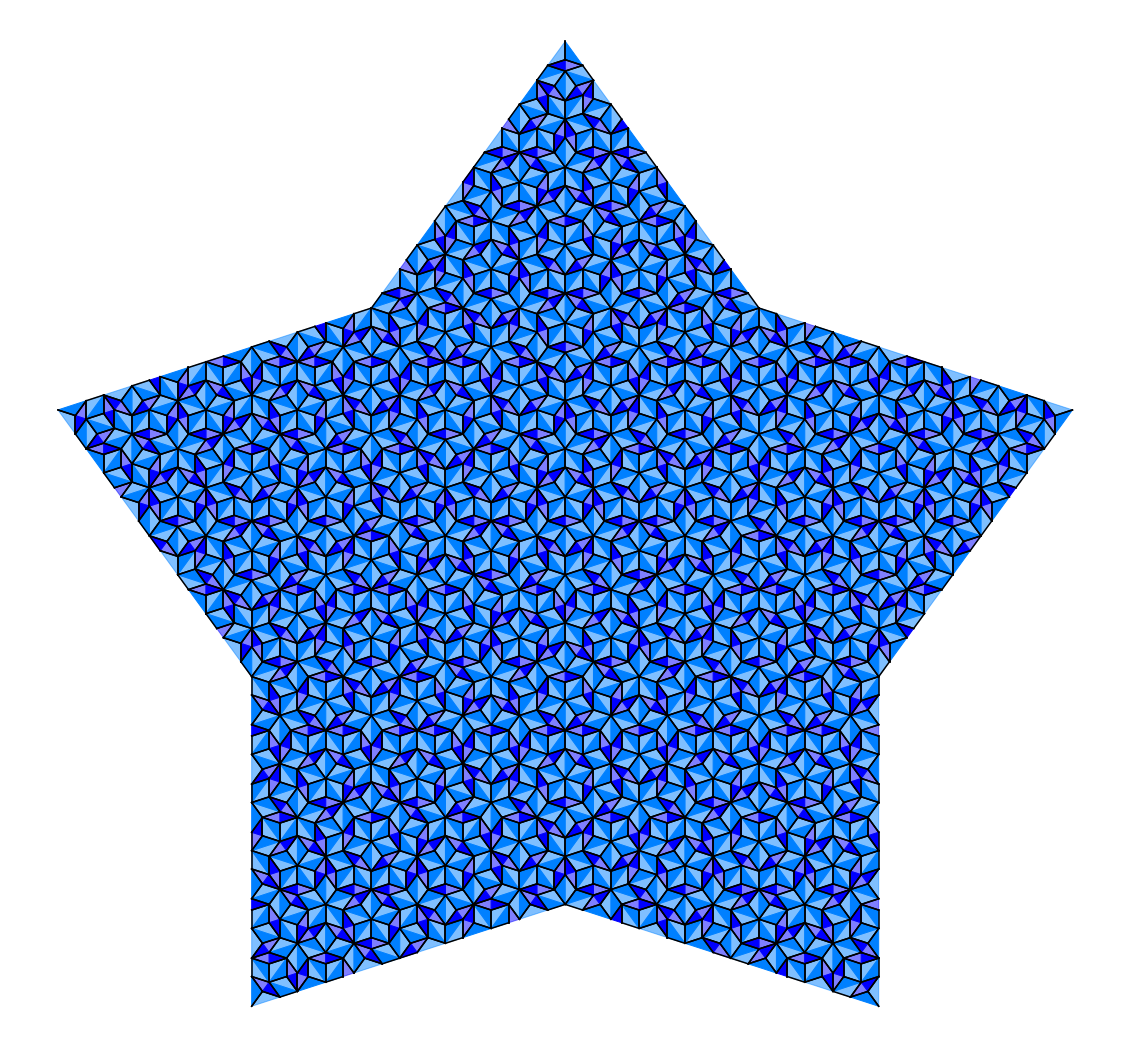

In [13]:
# penrose tiling based on a star consisting of 10 acute robinson triangle of type 2 with 6 iterations 
rts = []
for i in range(5):
    A = rotate(complex(1), complex(0), i * 72 - 18)
    rt_f = RobinsonTriangle(2, 'O', 'F', A, complex(0))
    rt_b = RobinsonTriangle(2, 'O', 'B', A, rotate(rt_f.C, complex(0), 72))
    rts += [rt_f, rt_b]
rts = deflate(rts, iter_depth=6)
draw_rts(rts, fig_width=20)

<Figure size 432x288 with 0 Axes>

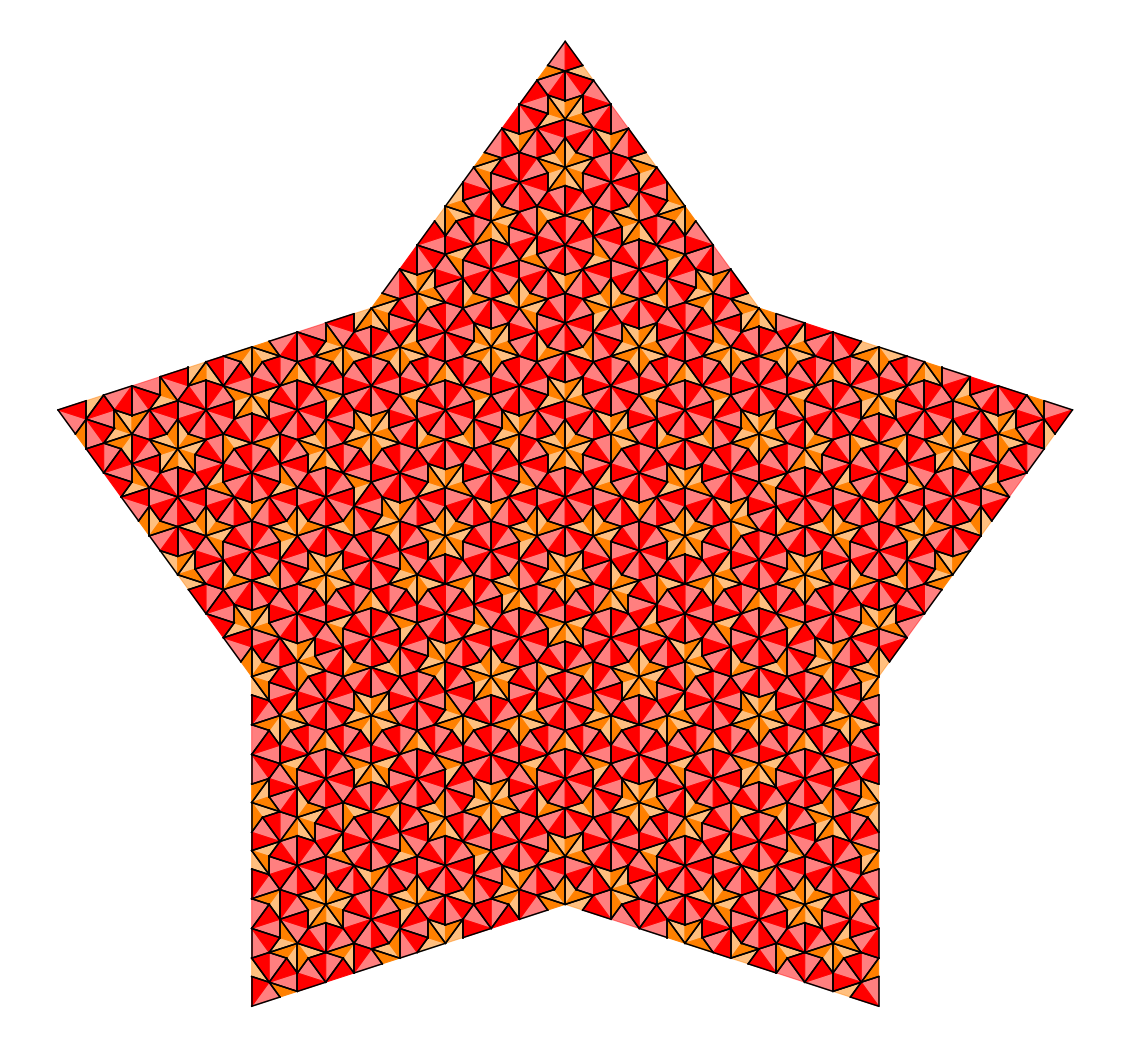

In [14]:
# penrose tiling based on a star consisting of 10 acute robinson triangle of type 1 with 6 iterations 
rts = []
for i in range(5):
    A = rotate(complex(1), complex(0), i * 72 - 18)
    rt_f = RobinsonTriangle(1, 'O', 'F', A, complex(0))
    rt_b = RobinsonTriangle(1, 'O', 'B', A, rotate(rt_f.C, complex(0), 72))
    rts += [rt_f, rt_b]
rts = deflate(rts, iter_depth=6)
draw_rts(rts, fig_width=20)

<Figure size 432x288 with 0 Axes>

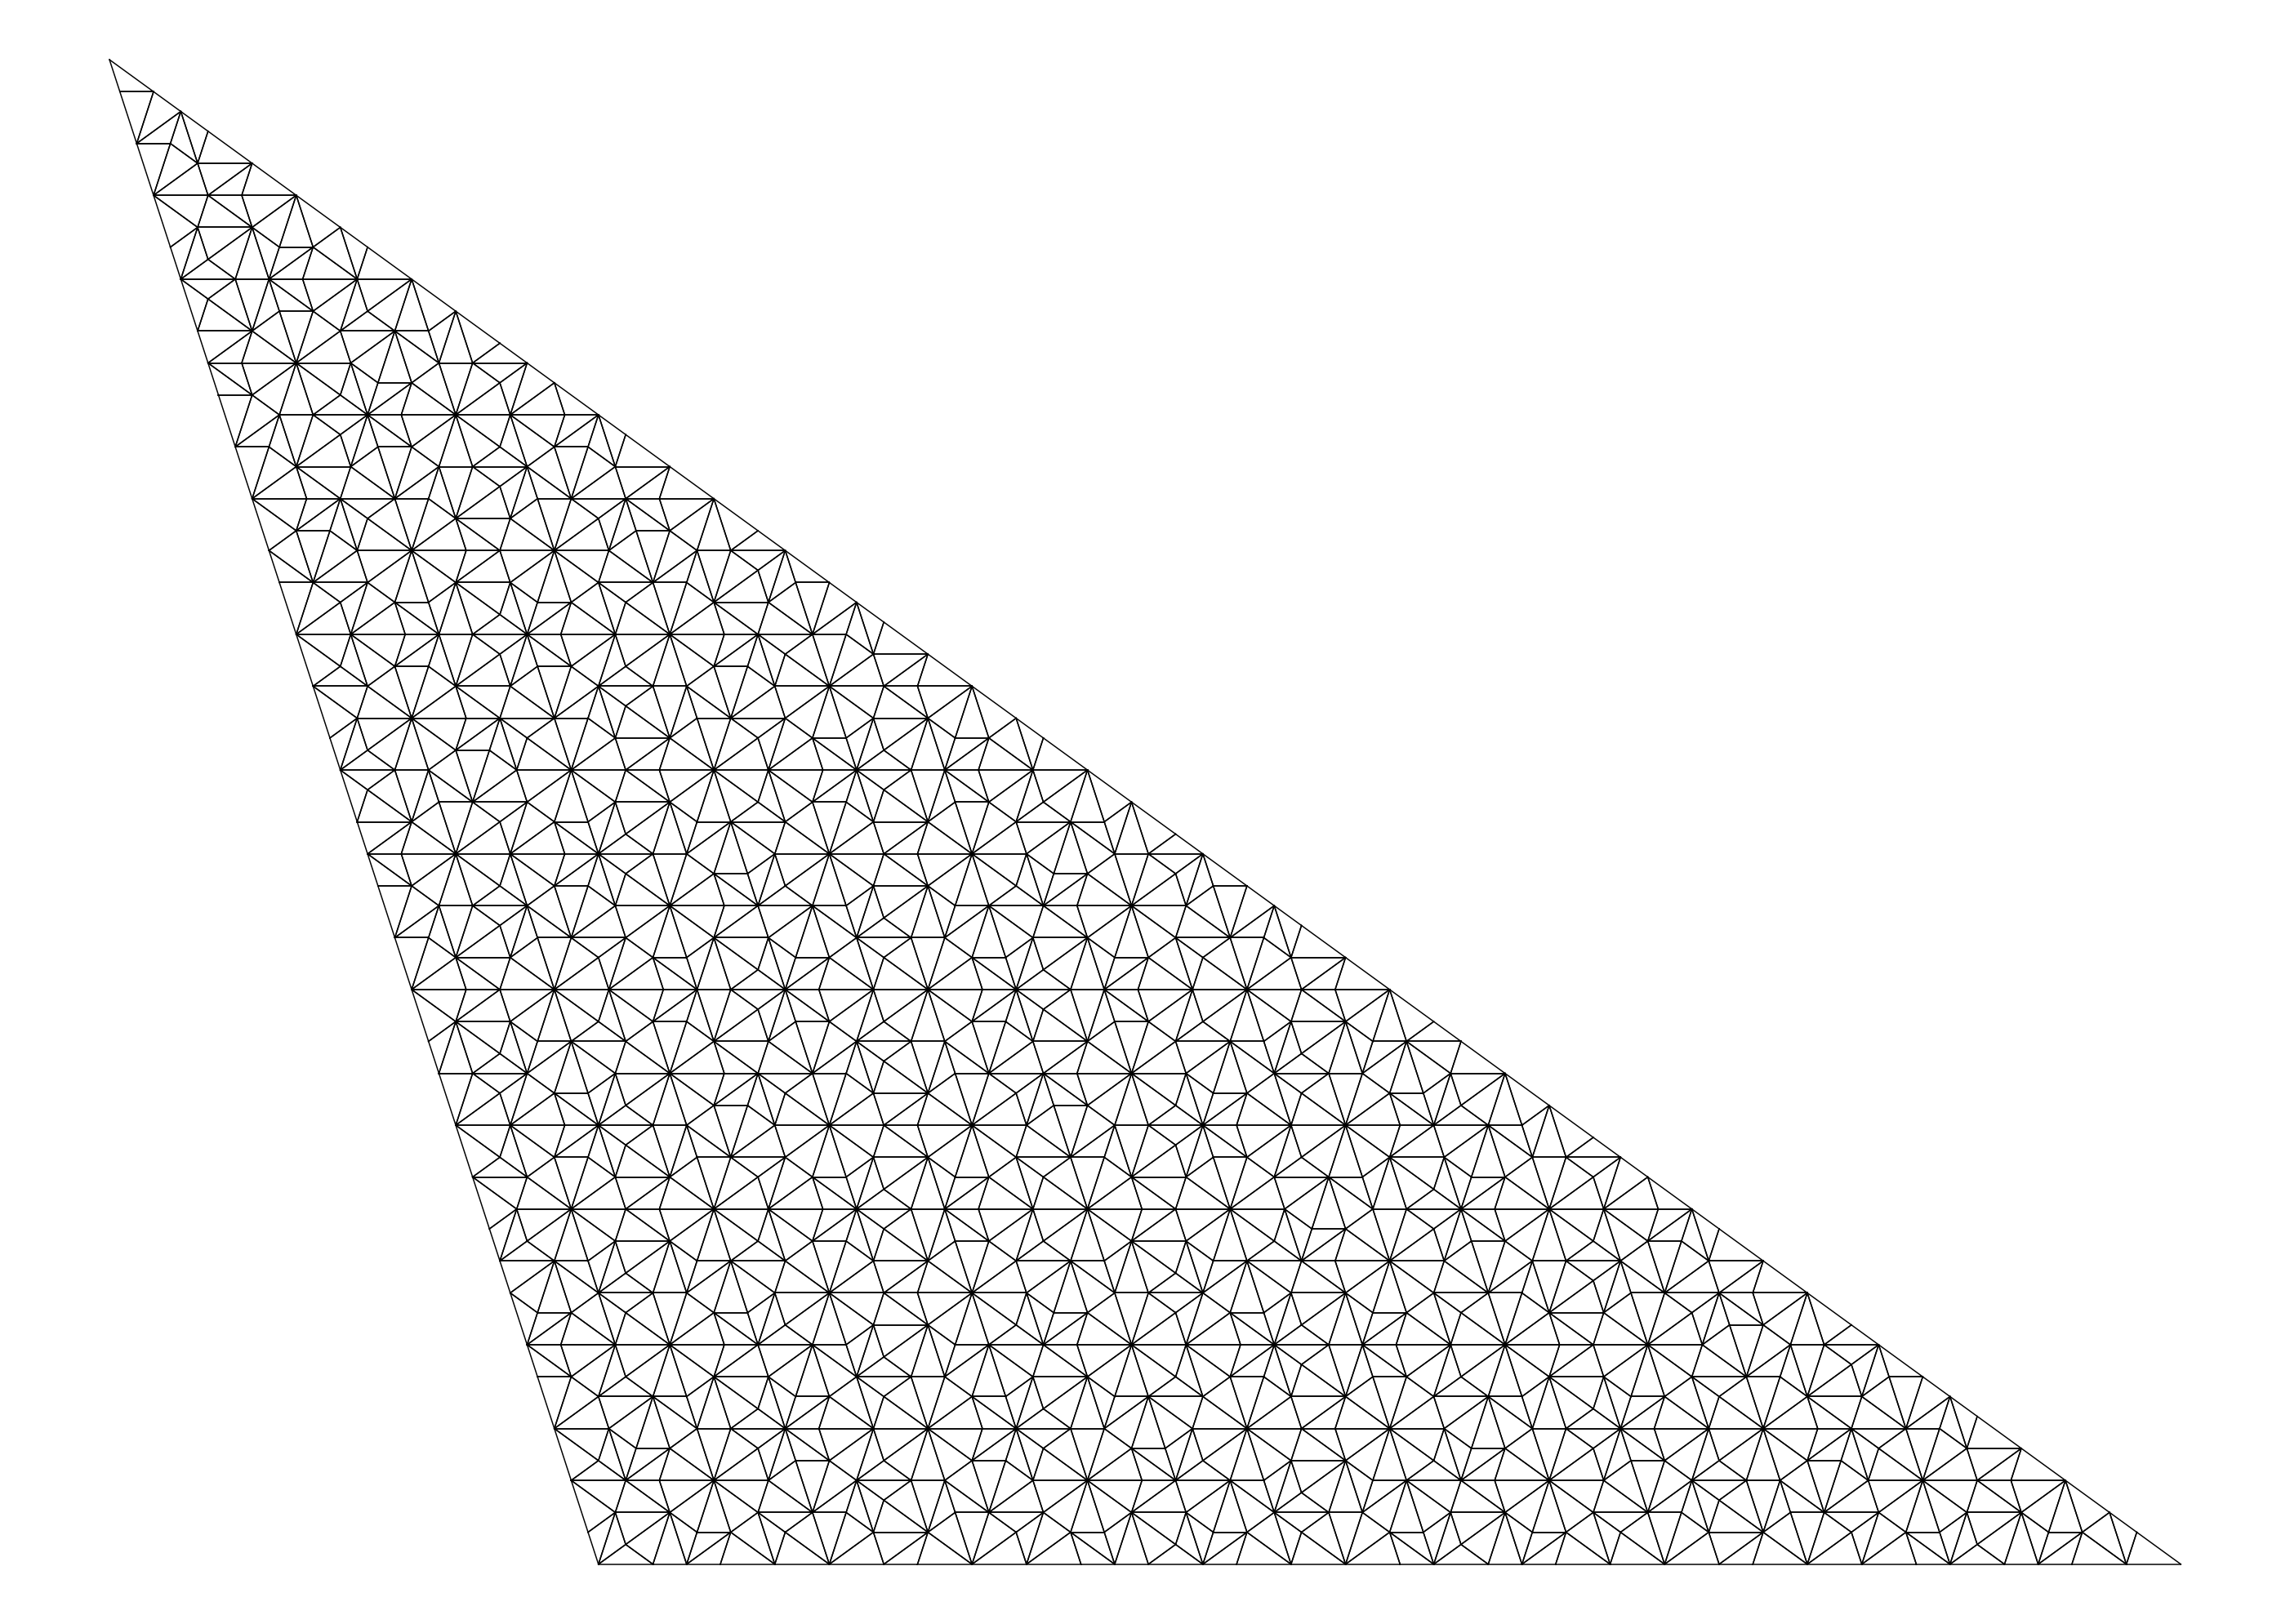

In [19]:
# penrose tiling of an obtuse back side robinson triangle of type 1 with 8 deflations with base sides and without coloring
draw_penrose_tiling(1, 'O', 'B', 8, draw_common_side=True, fill=False)

<Figure size 432x288 with 0 Axes>

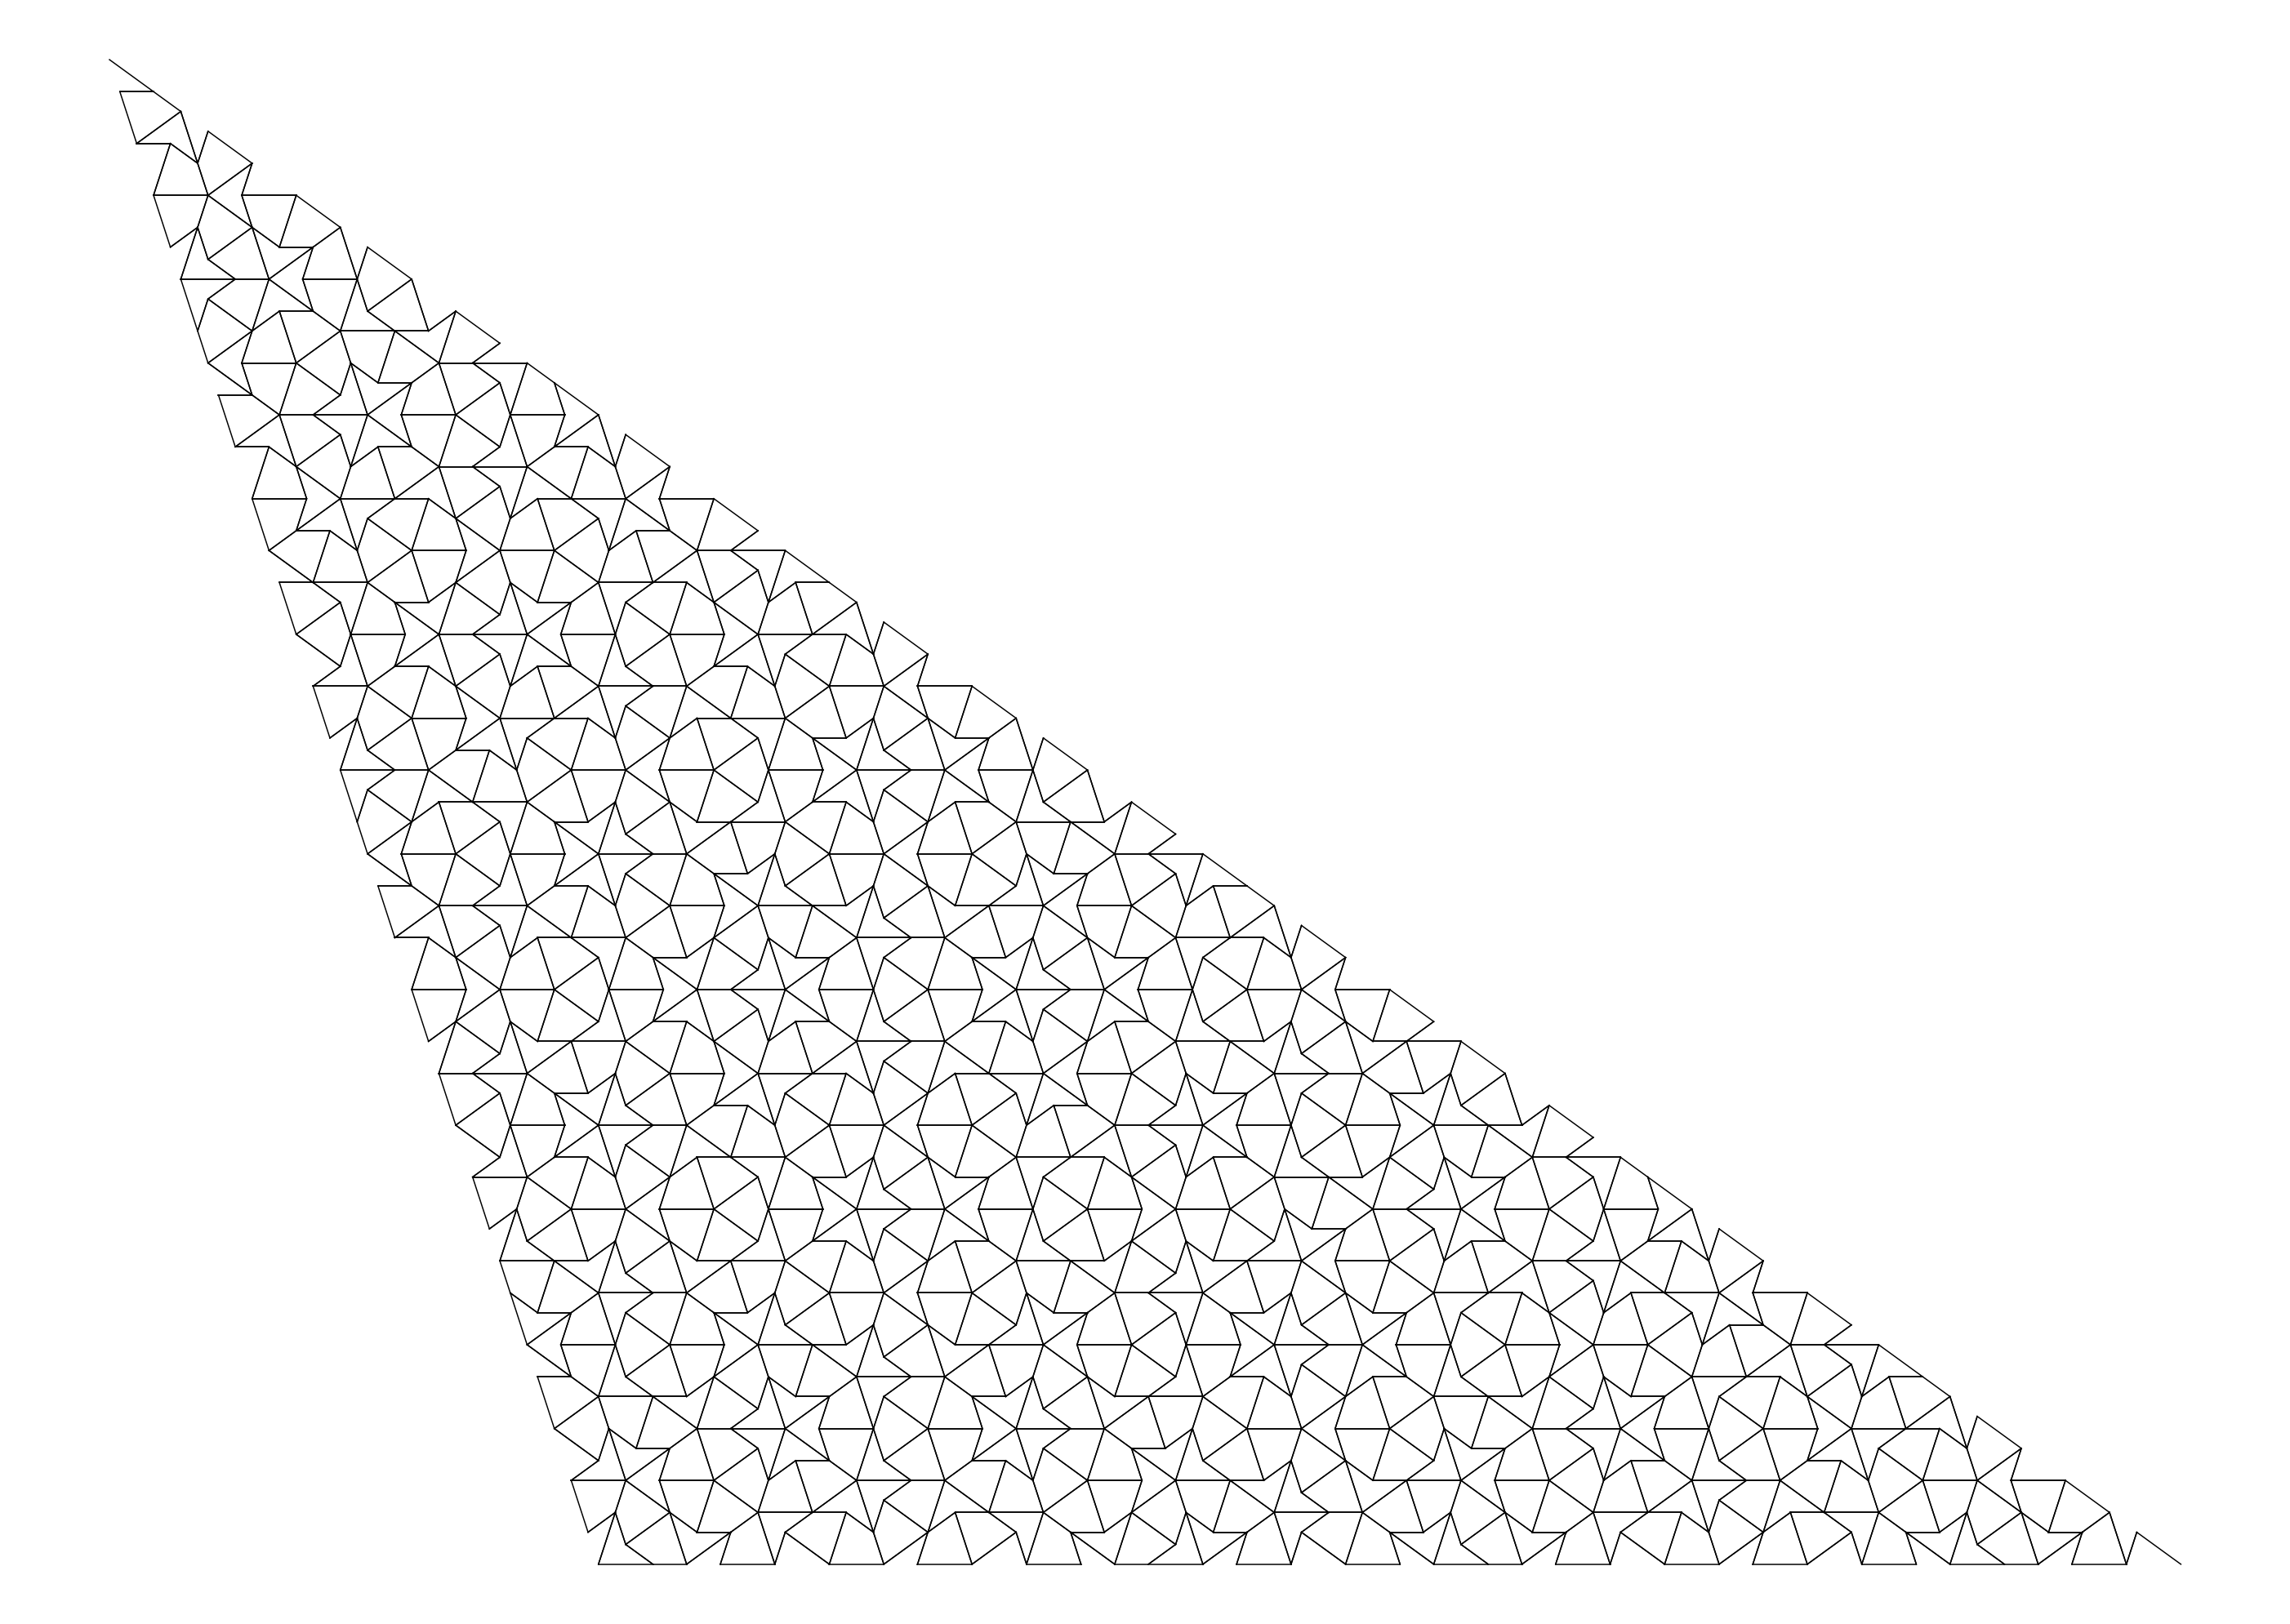

In [20]:
# penrose tiling of an obtuse back side robinson triangle of type 1 with 8 deflations with base sides and without coloring
draw_penrose_tiling(1, 'O', 'B', 8, fill=False)

In [17]:
# saves the penrose tilings based on the 8 robinson triangles without coloring to a svg-file
for (t_type, shape, side) in itertools.product(TRIANGLE_TYPES, SHAPES, SIDES):
    draw_penrose_tiling(t_type, shape, side, 8, fill=False, svg_file_name='penrose_tiling_{}_{}_{}.svg'.format(t_type, shape, side), draw=False)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [18]:
# saves the penrose tilings based on the 8 robinson triangles with coloring to a svg-file
for (t_type, shape, side) in itertools.product(TRIANGLE_TYPES, SHAPES, SIDES):
    draw_penrose_tiling(t_type, shape, side, 8, svg_file_name='penrose_tiling_colored_{}_{}_{}.svg'.format(t_type, shape, side), draw=False)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>